In [1]:
# Import libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [2]:
# Read dataset
data = pd.ExcelFile('C://Users/Nikanshi/Documents/MSBA/spring20/Practicum/POC-DATA-JUNE1.xlsx')


In [3]:
data.sheet_names

['CUSTOMER SEGMENTATION',
 'Sheet1',
 '2018 PLAN',
 'SALES_DATA',
 'PRODUCT',
 'INVENTORY DATA',
 'CUSTOMER_DATA',
 'INVENTORY SEGMENTATION']

In [4]:
sales = data.parse("SALES_DATA")

In [5]:
sales.head()

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,Unnamed: 15
0,536390,20668,13.500,2016,2016-12-01 00:00:00,1.015120,13.704120,17511,United Kingdom,-0.004235,Delivery Truck,1.019419,13.762152,SOUTH,GRACE J,NaN
1,536398,21980,8.000,2016,2016-12-01 00:00:00,0.985152,7.881216,13448,United Kingdom,0.030945,UPS ground 3rd day,0.954666,7.637328,NORTH,JOHN A,NaN
2,536390,21786,2.700,2016,2016-12-01 00:00:00,0.963744,2.602109,17511,United Kingdom,0.036013,Delivery Truck,0.929036,2.508398,SOUTH,GRACE J,NaN
3,536370,22540,648.000,2016,2016-12-01 00:00:00,1.070056,693.396288,12583,France,-0.038759,Delivery Truck,1.111530,720.271440,NORTH,JOHN A,NaN
4,536395,21212,1.075,2016,2016-12-01 00:00:00,1.022990,1.099714,13767,United Kingdom,-0.059961,UPS Next day Air,1.084329,1.165654,NORTH,JOHN A,NaN


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 16 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null int64
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null float64
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Unnamed: 15         166199 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 69.1+ MB


In [7]:
sales.drop(sales.columns[len(sales.columns)-1], axis=1, inplace=True)
#rfm = sales['InvoiceNo','Invoice Date', 'Ext-Price', 'CustomerID']

In [8]:
print('Number of unique cutsomers') 
sales['CustomerID'].nunique()

Number of unique cutsomers


4146

In [9]:
print('Number of unique transactions') 
sales['InvoiceNo'].nunique()

Number of unique transactions


25111

In [10]:
print('Number of days') 
sales['Invoice Date'].nunique()

Number of days


657

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 15 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null int64
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null float64
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 64.8+ MB


In [12]:
#covert invoice date to date time format
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'], errors ='coerce')

In [13]:
print('{:,} rows; {:,} columns'
      .format(sales.shape[0], sales.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(sales[sales.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(sales['Invoice Date'].min(),
                                    sales['Invoice Date'].max()))

566,309 rows; 15 columns
0 transactions don't have a customer id
Transactions timeframe from 2016-12-01 00:00:00 to 2018-12-27 00:00:00


# Data transformation for RFM

In [14]:
# --Group data by customerID--
# Create GM columns to calculate Gross Margin --- MONETARY parameter
sales['GM'] = sales['Ext-Price'] - sales['EXT COST']

# Create snapshot date to calculate number of days
snapshot_date = sales['Invoice Date'].max() + timedelta(days=1)
print(snapshot_date)
# Grouping by CustomerID
data_process = sales.groupby(['CustomerID']).agg({
        'Invoice Date': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'GM': 'sum'})
# Rename the columns 
data_process.rename(columns={'Invoice Date': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'GM': 'MonetaryValue'}, inplace=True)

2018-12-28 00:00:00


In [15]:
# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           233          2 -104578.698258
12347            22        222    1076.112369
12348            13         50      93.519578
12349           402         69     136.478325
12350           149         33     -10.098201
4,146 rows; 3 columns


C:\Users\Nikanshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


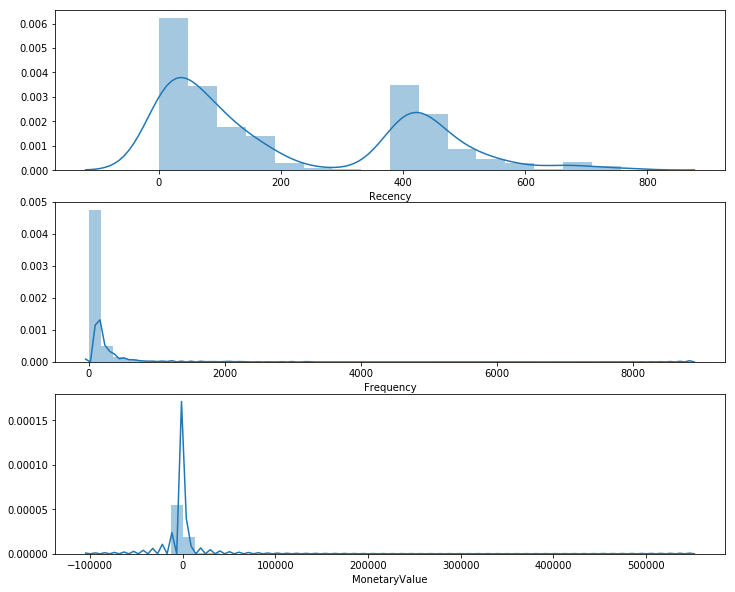

In [16]:
import seaborn as sns
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

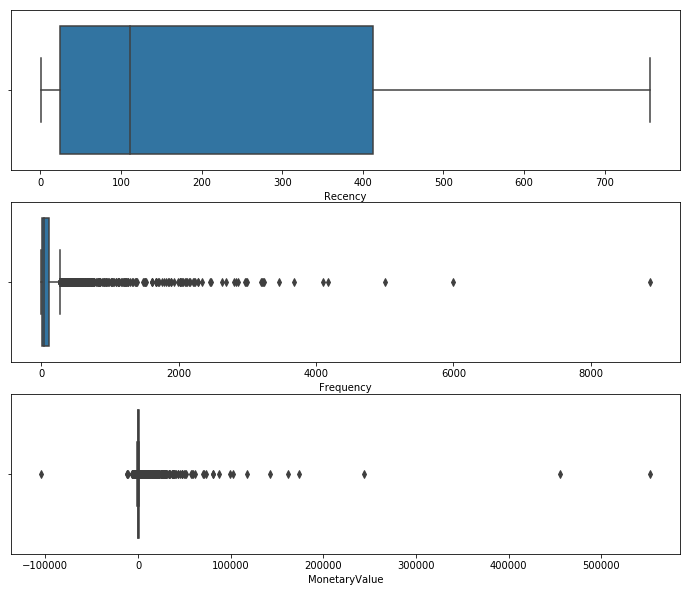

In [17]:
import seaborn as sns
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.boxplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.boxplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.boxplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [18]:
data_process.describe()

,Recency,Frequency,MonetaryValue
count,4146.000000,4146.000000,4146.000000
mean,213.103956,136.591655,1787.520233
std,201.418923,359.871483,14029.709542
min,1.000000,1.000000,-104578.698258
25%,24.000000,19.000000,15.454436
50%,111.000000,48.000000,127.201071
75%,412.000000,120.000000,612.644140
max,756.000000,8857.000000,552235.860191


In [19]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346,233,2,-104578.698258,2,1
12347,22,222,1076.112369,4,4
12348,13,50,93.519578,4,3
12349,402,69,136.478325,2,3
12350,149,33,-10.098201,2,2


In [20]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)
data_process.head()

#"Scale 1-4 bad to best"

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346,233,2,-104578.698258,2,1,1
12347,22,222,1076.112369,4,4,4
12348,13,50,93.519578,4,3,2
12349,402,69,136.478325,2,3,3
12350,149,33,-10.098201,2,2,1


In [21]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346,233,2,-104578.698258,2,1,1,211
12347,22,222,1076.112369,4,4,4,444
12348,13,50,93.519578,4,3,2,432
12349,402,69,136.478325,2,3,3,233
12350,149,33,-10.098201,2,2,1,221


In [22]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()

print('No. of Segments are ' + str(rfm_count_unique.sum()))


No. of Segments are 64


In [23]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerID
12346     4.0
12347    12.0
12348     9.0
12349     8.0
12350     5.0
Name: RFM_Score, dtype: float64


In [24]:
# Count num of unique segments by RFM score
rfm_count_unique = rfm.groupby('RFM_Score')['RFM_Score'].nunique()

print('No. of Segments by RFM score are ' + str(rfm_count_unique.sum()))


No. of Segments by RFM score are 10


In [25]:
print(rfm['RFM_Score'].max())
print(rfm['RFM_Score'].min())

12.0
3.0


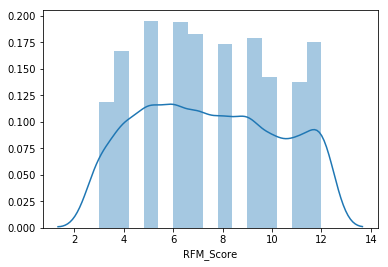

In [26]:
sns.distplot(rfm['RFM_Score'])

In [27]:
rfm_score_agg = rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_score_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         502.8       8.2         -42.8   295
4.0         416.2      14.8        -255.8   416
5.0         371.1      24.4           2.7   486
6.0         275.1      35.5         990.4   484
7.0         213.4      51.1         496.8   456
8.0         137.5      68.9        1755.3   431
9.0         107.5     108.9         542.5   446
10.0         70.0     138.4        1425.2   353
11.0         40.1     254.4        3004.0   342
12.0         13.0     666.5        9826.0   437


In [28]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12346,233,2,-104578.698258,2,1,1,211,4.0
12347,22,222,1076.112369,4,4,4,444,12.0
12348,13,50,93.519578,4,3,2,432,9.0
12349,402,69,136.478325,2,3,3,233,8.0
12350,149,33,-10.098201,2,2,1,221,5.0


In [29]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,233,2,-104578.698258,2,1,1,211,4.0,Needs Attention
12347,22,222,1076.112369,4,4,4,444,12.0,Can't Loose Them
12348,13,50,93.519578,4,3,2,432,9.0,Can't Loose Them
12349,402,69,136.478325,2,3,3,233,8.0,Champions
12350,149,33,-10.098201,2,2,1,221,5.0,Promising


In [30]:
# export_csv = rfm.to_csv(r'C:\Users\Nikanshi\Documents\MSBA\spring20\Practicum\RFM_GM.csv', index = True, header=True)

In [31]:
# # Calculate average values for each RFM_Level, and return a size of each segment 
# rfm_level_agg = rfm.groupby('RFM_Level').agg({
# #     'Recency': 'mean',
#     'Frequency': 'mean',
#     'MonetaryValue': ['mean', 'count']
# }).round(1)
# # Print the aggregated dataset
# print(rfm_level_agg)

In [32]:
# rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
# rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
# #Create our plot and resize it.
# fig = plt.gcf()
# ax = fig.add_subplot()
# fig.set_size_inches(16, 9)
# squarify.plot(sizes=rfm_level_agg['Count'], 
#               label=['Can\'t Loose Them',
#                      'Champions',
#                      'Loyal',
#                      'Needs Attention',
#                      'Potential', 
#                      'Promising', 
#                      'Require Activation'], alpha=.6 )
# plt.title("RFM Segments based on Gross Margin",fontsize=18,fontweight="bold")
# plt.axis('off')
# plt.show()

Analyzing RFM Segmentation
Let’s delve into few interesting segments:

Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.

Potential Loyalists are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.

New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.

At Risk Customers are your customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.

Can’t Lose Them are customers who used to visit and purchase quite often, but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

source: https://clevertap.com/blog/rfm-analysis/

# K-Means

https://towardsdatascience.com/who-is-your-golden-goose-cohort-analysis-50c9de5dbd31

# K-Means Pre Processing

In [33]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Nikanshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


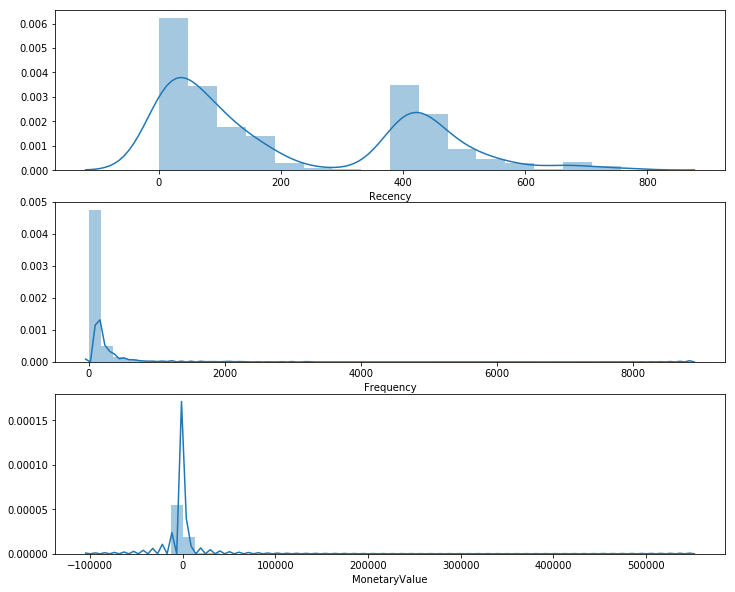

In [34]:
import seaborn as sns
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

In [35]:
#removing outliers
#remove negative outliers

rfm = rfm[(rfm.MonetaryValue > -10000)]




In [36]:
#remove positive outliers
rfm = rfm[(rfm.MonetaryValue < 288344)]


In [37]:
rfm.MonetaryValue.min()

-7048.222428647105

In [38]:
rfm.MonetaryValue.max()

244259.78220081358

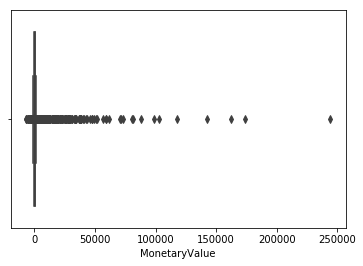

In [39]:
sns.boxplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

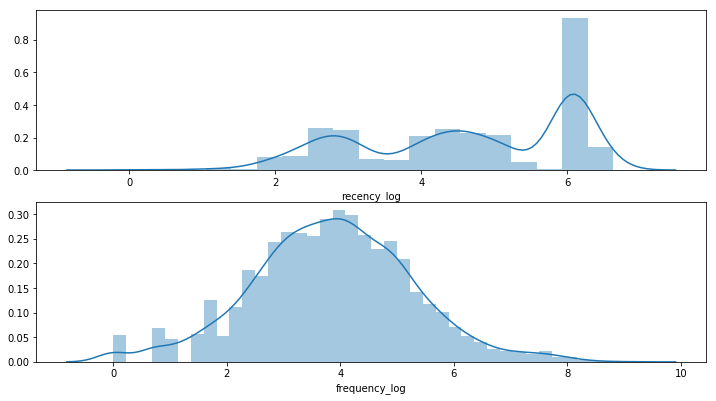

In [40]:
#Apply log tranformation to Receny and Frequency for skewness
rfm['recency_log'] = np.log(rfm['Recency'])

rfm['frequency_log'] = np.log(rfm['Frequency'])

plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['recency_log'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency_log'])


In [41]:

#find monetary min 
rfm.MonetaryValue.min()


-7048.222428647105

In [42]:
#Convert Monetray Value to positive

rfm['M+'] = rfm['MonetaryValue'] + 7048.222428647105 + 1
rfm['M+'].describe()

count      4140.000000
mean       8629.795347
std        8451.115543
min           1.000000
25%        7064.842264
50%        7176.636841
75%        7661.841406
max      251309.004629
Name: M+, dtype: float64

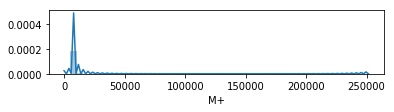

In [43]:
plt.subplot(3, 1, 3); sns.distplot(rfm['M+'])
# Show the plot
plt.show()

In [44]:
#log transformation for M+

rfm['monetary_log'] = np.log(rfm['M+'])


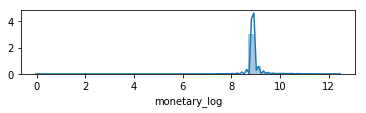

In [45]:
# Plot distribution of F
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary_log'])


In [46]:
rfm_log = rfm[['recency_log', 'frequency_log', 'monetary_log']]

Scaling data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
scaler.fit(rfm_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
normalized_rfm = scaler.transform(rfm_log)

In [50]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(normalized_rfm)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

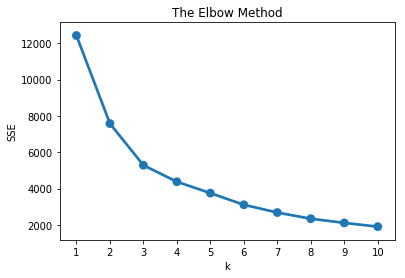

In [51]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [52]:
kmeans4 = KMeans(n_clusters=4, random_state=1)

In [53]:
kmeans4.fit(normalized_rfm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [54]:
cluster_labels = kmeans4.labels_

In [55]:
K4 = rfm.assign(Cluster = cluster_labels)

In [56]:
K4.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          29.0     186.0        1053.0  1353
1         271.0      67.0         238.0  1557
2          32.0    1293.0       30096.0   153
3         386.0      11.0         133.0  1077

In [57]:
export_csv = K4.to_csv(r'C:\Users\Nikanshi\Documents\MSBA\spring20\Practicum\K4.csv', index = True, header=True)

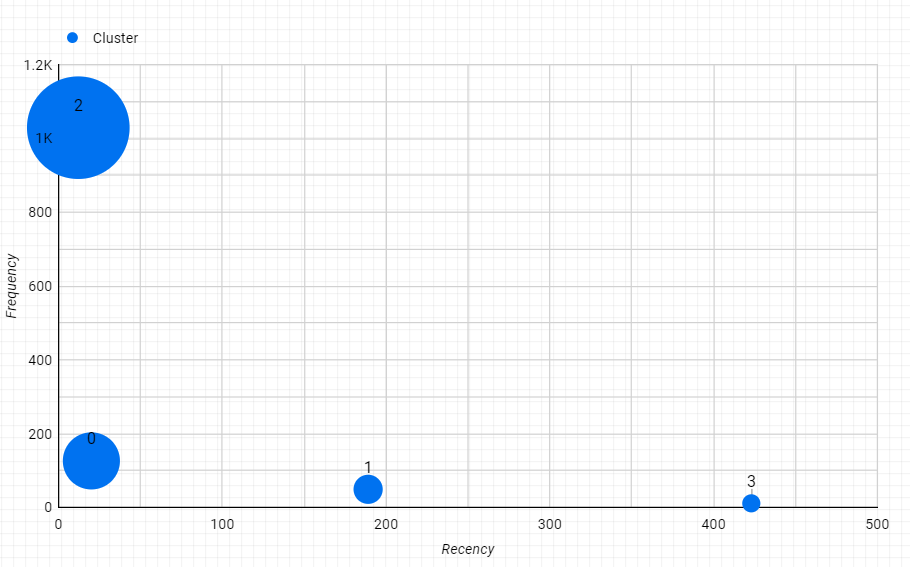

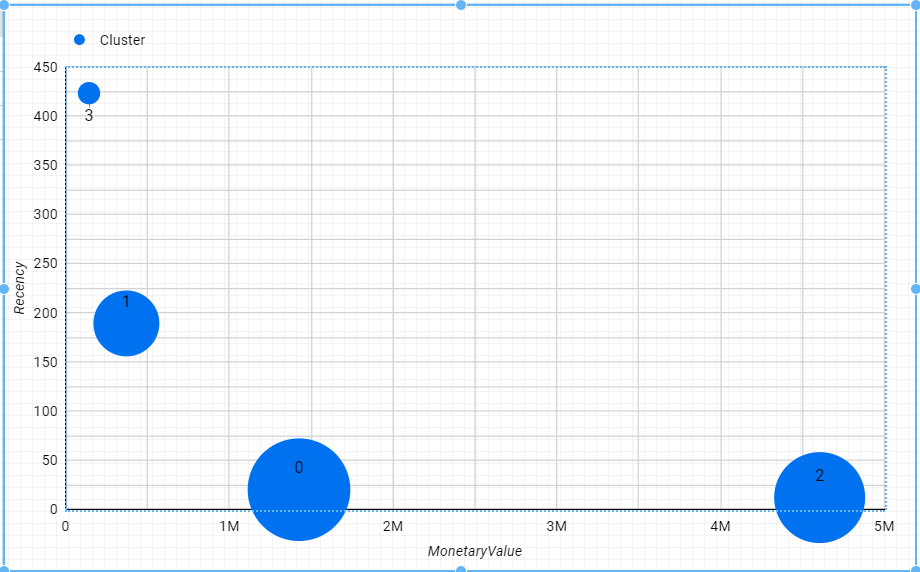

Customer Segment Assignments

Cluster 2 -> Superstars/ Can't loose them

Cluster 0 -> Loyal Champions

Cluster 1 -> Potential

Cluster 3 -> Requires Activation

In [58]:
def segment(df):
    if df['Cluster'] == 2:
        return 'Superstars'
    elif df['Cluster'] == 0:
        return 'Loyal Champions'
    elif df['Cluster'] == 1:
        return 'Potential'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
K4['Customer Segment'] = K4.apply(segment, axis=1)
# Print the header with top 5 rows to the console
K4.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level,recency_log,frequency_log,M+,monetary_log,Cluster,Customer Segment
CustomerID,,,,,,,,,,,,,,,
12347,22,222,1076.112369,4,4,4,444,12.0,Can't Loose Them,3.091042,5.402677,8125.334797,9.002742,0,Loyal Champions
12348,13,50,93.519578,4,3,2,432,9.0,Can't Loose Them,2.564949,3.912023,7142.742007,8.873852,0,Loyal Champions
12349,402,69,136.478325,2,3,3,233,8.0,Champions,5.996452,4.234107,7185.700754,8.879848,1,Potential
12350,149,33,-10.098201,2,2,1,221,5.0,Promising,5.003946,3.496508,7039.124228,8.859239,1,Potential
12352,101,73,258.246166,3,3,3,333,9.0,Can't Loose Them,4.615121,4.290459,7307.468595,8.896652,1,Potential


In [59]:
Customer_Segments = K4[['Recency','Frequency','MonetaryValue','Customer Segment']]

In [60]:
Customer_Segments.head()

,Recency,Frequency,MonetaryValue,Customer Segment
CustomerID,,,,
12347,22,222,1076.112369,Loyal Champions
12348,13,50,93.519578,Loyal Champions
12349,402,69,136.478325,Potential
12350,149,33,-10.098201,Potential
12352,101,73,258.246166,Potential


In [61]:
export_csv = Customer_Segments.to_csv(r'C:\Users\Nikanshi\Documents\MSBA\spring20\Practicum\Customer_Segments.csv', index = True, header=True)

In [62]:
kmeans5 = KMeans(n_clusters=5, random_state=1)

In [63]:
kmeans5.fit(normalized_rfm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [64]:
cluster_labels = kmeans5.labels_

In [65]:
K5 = rfm.assign(Cluster = cluster_labels)

In [66]:
K5.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         390.0      59.0         224.0  1200
1          63.0      58.0         270.0  1159
2          34.0    1398.0       33873.0   130
3          27.0     277.0        1699.0   862
4         398.0       9.0         118.0   789

In [67]:
# export_csv = K5.to_csv(r'C:\Users\Nikanshi\Documents\MSBA\spring20\Practicum\K5.csv', index = True, header=True)